In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys
from copy import deepcopy

/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
clustering = pd.read_csv('clustering.csv',header=None)
shape = pd.read_csv('ShapedData.csv',header=None)

data_1=np.array(clustering)
data_2=np.array(shape)

In [3]:
def dist(a,b): #ord_norm: none,1,'fro'
    return np.linalg.norm(a - b)

In [25]:
"""data_1.shape[0]
np.random.randint(data_1.shape[0])
first_c= np.random.randint(data_1.shape[0])
print(first_c)
data_1[first_c]"""

1159


array([5.2136, 2.8713])

In [27]:
"""data_1[1159]
data_1[1159,:]"""

array([5.2136, 2.8713])

[array([7.0784, 1.3338])]


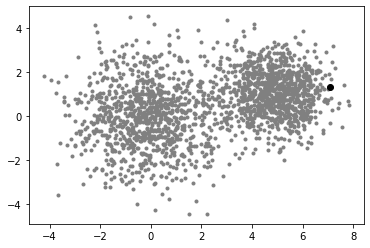

In [50]:
"""
centroids = []
centroids.append(data_1[np.random.randint(data_1.shape[0]), :])
print(centroids)
plt.scatter(data_1[:, 0], data_1[:, 1], marker = '.', color = 'gray', label = 'data points')
plt.scatter(centroids[0][0], centroids[0][1],color = 'black', label = 'previously selected centroids')
plt.show()
"""

In [51]:
"""
for i in range(1):
        
        distance=[]
        #phi=0
        
        """
        #1. find the nearest center for each observation
        #2. calculate d(xi,cj)
        """
        for i in range(len(data_1)): # for each observation
            min=9999
            for j in range(len(centroids)): # compare distance with each center
                d = dist(data_1[i], centroids[j])
                if d < min:
                    min=d
                    #phi[i] = distances # store the distance to the closest center for each observation
                    #index[i] = j
            distance.append(min)
#distance    
        max_dist = max(distance)
        for n in range(len(distance)):
            if distance[n]==max_dist:
                next_c_position = n
        centroids.append(data_1[n])
centroids
"""

[array([7.0784, 1.3338]), array([4.0792, 4.0048])]

In [47]:
"""len(distance)"""

2000

In [31]:
"""maxx=max(distance)
maxx"""

8.968744966855732

## Initialization

In [145]:
def InitialCenters(X,K):
    
    Y=[] #list for storing centers
    first_c_position= np.random.randint(X.shape[0]) # randomly select a position within obersavation
    Y.append(X[first_c_position]) # add the randomly selected observation to center list
    label = np.zeros(len(X)) # index matrix
    phi = np.zeros(len(X))
    
    """
    search for another (k-1) centers from observation
    """
    for i in range(K-1):
        
        distance=[]
        #phi=0
        
        """
        1. find the nearest center for each observation
        2. calculate d(xi,cj)
        """
        for i in range(len(X)): # for each observation
            min=9999
            for j in range(len(Y)): # compare distance with each center
                d = dist(X[i], Y[j])
                if d < min:
                    min=d
                    #phi[i] = distances # store the distance to the closest center for each observation
                    #index[i] = j
            distance.append(min)  # store the distance to the closest center for each observation (by order)
        
        """
        select the observation with the biggest distance as the next center
        """
        max_dist = max(distance)
        for n in range(len(distance)):
            if distance[n]==max_dist:
                next_c_position = n
        Y.append(X[next_c_position])
        
        distance=[]
        
    """   
    Y_array=np.array(Y)
    plt.scatter(data_1[:, 0], data_1[:, 1], c='b')
    plt.scatter(Y1[:, 0], Y1[:, 1], marker='*', s=150, c='k')
    plt.title('Initial K-centers (k=%d)'%(len(Y)))
    plt.show()
    """
    
    """
    Grouping
    """
    for i in range(len(X)): # for each observation
        min_val=9999
        for j in range(0,K): # compare distance with each center
            distances = dist(X[i], Y[j])
            if distances < min_val:
                min_val=distances
                phi[i] = min_val # store the distance to the closest center for each observation
                label[i] = j
    obj=max(phi)
    #max_dist
    
    return Y, label, obj

In [180]:
Y,label,obj=InitialCenters(data_1,4)
print(Y)
print(label)
print(obj)

[array([5.0322 , 0.44239]), array([-3.6773, -3.5965]), array([-2.1987,  4.1088]), array([ 2.2232, -4.4286])]
[3. 1. 2. ... 0. 0. 0.]
4.790664379895548


In [126]:
Y1=np.array(Y)
print(Y1)
Y1[:,0]

[[ 0.56263 -0.13473]
 [ 7.1976   3.1657 ]]


array([0.56263, 7.1976 ])

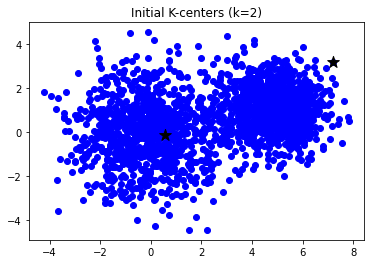

5.4736512437129194


In [127]:
plt.scatter(data_1[:, 0], data_1[:, 1], c='b')
plt.scatter(Y1[:, 0], Y1[:, 1], marker='*', s=150, c='k')
plt.title('Initial K-centers (k=%d)'%(len(Y)))
plt.show()
print(obj)

## Greedy K-centers:

In [174]:
def Greedy_K_centers (X,K):
    
    iteration = 25
    Y_store=[0]*iteration
    obj_store=[0]*iteration
    label_store=[0]*iteration
    colors = ['r', 'g', 'b','y', 'c', 'm','orange','purple']
    
    for i in range (0,iteration):
        d=999
        Y,label,obj=InitialCenters(X,K)
        
        Y_store[i]=Y
        label_store[i]=label
        obj_store[i]=obj
    
    
    min_d=9999
    index=0
    for j in range(len(obj_store)):
        if obj_store[j]< min_d:
            min_d = obj_store[j]
            index=j
            
    Y_best=np.array(Y_store[j])
    label_best=np.array(label_store[j])
    
    """
    plt.scatter(X[:, 0], X[:, 1], c='b')
    plt.scatter(Y_best[:, 0], Y_best[:, 1], marker='*', s=150, c='k')
    plt.title('Best Initial K-centers (k=%d, iteration :20)'%(len(Y)))
    plt.show()
    """
    
    for z in range (K):
        data=np.array([X[i] for i in range (len(label_best)) if label_best[i]==z])
        plt.scatter(data[:, 0], data[:, 1],s=5, c=colors[z])
        plt.scatter(Y_best[:, 0], Y_best[:, 1], marker='*', s=150, c='k')
        plt.title('Best Initial K-centers (k=%d, iteration :20)'%(len(Y)))
        plt.savefig('K-centers (k=%d, iteration :25)'%(len(Y)))
    plt.show()
    
    
    return Y_best, min_d

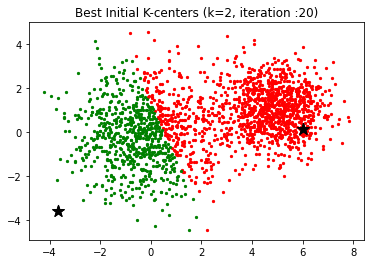

Y:  [[ 6.0221   0.13364]
 [-3.6773  -3.5965 ]] 

obj:  5.454431415509778


In [181]:
Y_best,min_d=Greedy_K_centers(data_1,2)
print("Y: ",Y_best,"\n\nobj: ",min_d)

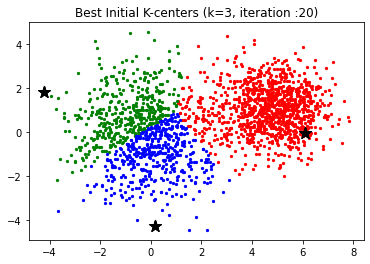

Y:  [[ 6.1075   -0.059268]
 [-4.2148    1.8237  ]
 [ 0.16513  -4.2623  ]] 

obj:  4.8812418948562675


In [182]:
Y_best,min_d=Greedy_K_centers(data_1,3)
print("Y: ",Y_best,"\n\nobj: ",min_d)

### Clustering

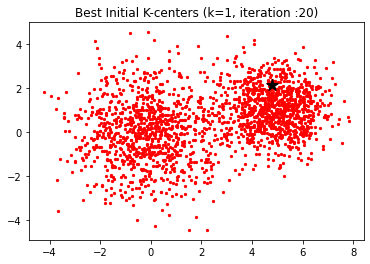

k=1 

centers:
 [[4.7744 2.1152]] 

obj:  6.856234379380566 





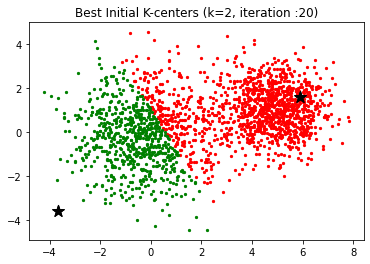

k=2 

centers:
 [[ 5.8796  1.5898]
 [-3.6773 -3.5965]] 

obj:  5.4903451522089215 





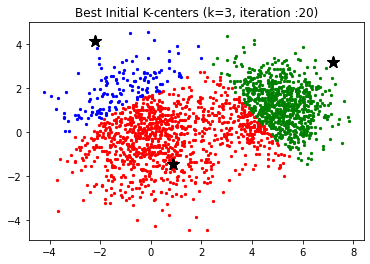

k=3 

centers:
 [[ 0.88748 -1.4478 ]
 [ 7.1976   3.1657 ]
 [-2.1987   4.1088 ]] 

obj:  4.823780312253969 





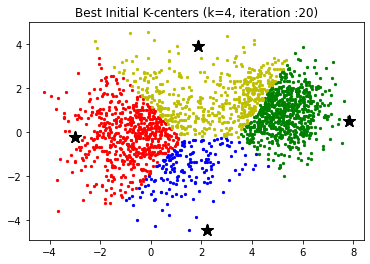

k=4 

centers:
 [[-2.9996  -0.23488]
 [ 7.8132   0.51561]
 [ 2.2232  -4.4286 ]
 [ 1.8645   3.882  ]] 

obj:  4.38844405283923 





 store_D:  [6.856234379380566, 5.4903451522089215, 4.823780312253969, 4.38844405283923]


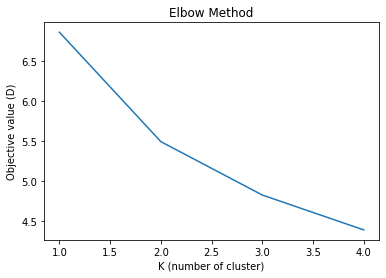

In [183]:
store_Obj1=[]
for i in range(1,5):
    Y_best,min_d=Greedy_K_centers(data_1,i)
    print("k=%d"%(i),"\n\ncenters:\n",Y_best,"\n\nobj: ",min_d,"\n\n\n")
    store_Obj1.append(min_d)
print("\n\n store_D: ",store_Obj1)

x=[1,2,3,4]
plt.xlabel('K (number of cluster)')
plt.ylabel('Objective value (D)')
plt.title('Elbow Method') 
plt.plot(x,store_Obj1)
plt.savefig("Elbow Method (Data: Clustering)")
plt.show()

### Shape

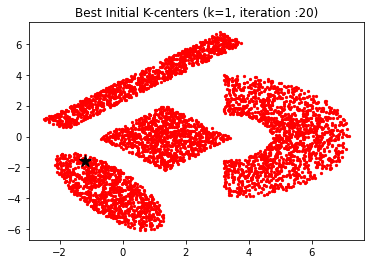

k=1 

centers:
 [[-1.19   -1.6139]] 

obj:  6.650238302564803 





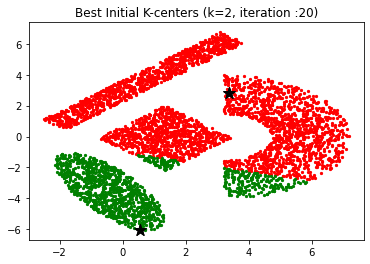

k=2 

centers:
 [[ 3.3819   2.8053 ]
 [ 0.54923 -6.0252 ]] 

obj:  6.05364136701209 





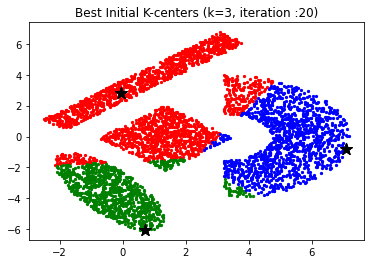

k=3 

centers:
 [[-0.06601  2.8207 ]
 [ 0.71578 -6.0515 ]
 [ 7.0904  -0.82791]] 

obj:  5.0861403156126155 





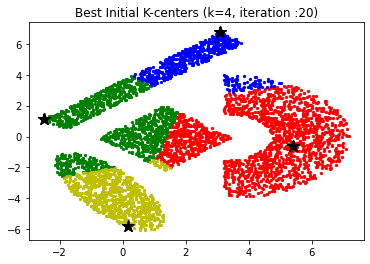

k=4 

centers:
 [[ 5.3926  -0.60165]
 [-2.4871   1.1324 ]
 [ 3.0811   6.7565 ]
 [ 0.16325 -5.806  ]] 

obj:  4.356824588217892 





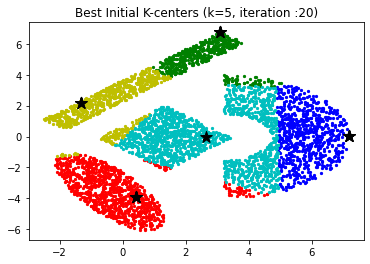

k=5 

centers:
 [[ 0.42116  -3.9318  ]
 [ 3.0811    6.7565  ]
 [ 7.165     0.066071]
 [-1.3173    2.1785  ]
 [ 2.6574   -0.011731]] 

obj:  4.021408733628055 





 store_D:  [6.650238302564803, 6.05364136701209, 5.0861403156126155, 4.356824588217892, 4.021408733628055]


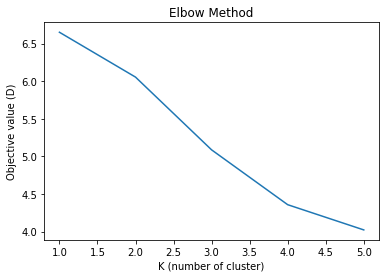

In [184]:
store_Obj2=[]
for i in range(1,6):
    Y_best,min_d=Greedy_K_centers(data_2,i)
    print("k=%d"%(i),"\n\ncenters:\n",Y_best,"\n\nobj: ",min_d,"\n\n\n")
    store_Obj2.append(min_d)
print("\n\n store_D: ",store_Obj2)

x=[1,2,3,4,5]
plt.xlabel('K (number of cluster)')
plt.ylabel('Objective value (D)')
plt.title('Elbow Method') 
plt.plot(x,store_Obj2)
plt.savefig("Elbow Method (Data: Shape)")
plt.show()

In [65]:
iteration = 20
a=[0]*iteration
b=[0]*iteration

In [66]:
a

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]